In [13]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [14]:
# Data locations
initialdata = '../data/zillow/Zip_ListingSale_Combined.csv'
cleaneddata = '../data/zillow/Cleaned/Zip_ListingSale_Clean.csv'
zip_codes = '../data/utils/zip_codes.csv'

In [15]:
zip_codes_df = pd.read_csv(zip_codes)
MiamiDadeCounty_ZipCodes = zip_codes_df[zip_codes_df['county'] == 'Miami-Dade']['zip'].values
BrowardCounty_ZipCodes = zip_codes_df[zip_codes_df['county'] == 'Broward']['zip'].values

In [16]:
# Data is from Zillow
# read_table is deprecated in Py 3.7; use read_csv instead
list_sale_data = pd.read_csv(initialdata)
list_sale_data.rename(columns={'RegionName':'ZipCode'}, inplace=True)
list_sale_data[:5]

Type  ZipCode        City State                                  Metro  \
0  Listing    33009  Hallandale    FL  Miami-Fort Lauderdale-West Palm Beach   
1  Listing    33010     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   
2  Listing    33012     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   
3  Listing    33013     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   
4  Listing    33014     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   

          CountyName  SizeRank   2010-01   2010-02   2010-03  ...   2018-12  \
0     Broward County       208  225500.0  239000.0  210000.0  ...  270000.0   
1  Miami-Dade County      2197       NaN       NaN       NaN  ...  309900.0   
2  Miami-Dade County       250       NaN       NaN       NaN  ...  264600.0   
3  Miami-Dade County      5078  180000.0  185000.0  177450.0  ...  339900.0   
4  Miami-Dade County      1996       NaN       NaN       NaN  ...  285000.0   

    2019-01   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07  \
0  265000.0  265000.0  270000.0  274900.0  275000.0  273750.0  270000.0   
1  304950.0  320499.5  325000.0  310000.0  312500.0  315000.0  315000.0   
2  275000.0  285000.0  295767.5  281300.0  290000.0  299000.0  288950.0   
3  340000.0  345000.0  345000.0  350000.0  345000.0  344950.0  334500.0   
4  279750.0  299000.0  289375.0  299000.0  295000.0  296750.0  300000.0   

    2019-08   2019-09  
0  279000.0  279000.0  
1  299950.0  314830.0  
2  279900.0  280000.0  
3  330000.0  342000.0  
4  289700.0  289700.0  

[5 rows x 124 columns]

In [17]:
# Rotates table so dates are tuples rather than columns
df_list_sale = list_sale_data.melt(id_vars=["Type","ZipCode", "City", "State", "Metro", "CountyName", "SizeRank"], 
        var_name="Date", 
        value_name="Price")
df_list_sale[:5]

Type  ZipCode        City State                                  Metro  \
0  Listing    33009  Hallandale    FL  Miami-Fort Lauderdale-West Palm Beach   
1  Listing    33010     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   
2  Listing    33012     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   
3  Listing    33013     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   
4  Listing    33014     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   

          CountyName  SizeRank     Date     Price  
0     Broward County       208  2010-01  225500.0  
1  Miami-Dade County      2197  2010-01       NaN  
2  Miami-Dade County       250  2010-01       NaN  
3  Miami-Dade County      5078  2010-01  180000.0  
4  Miami-Dade County      1996  2010-01       NaN

In [18]:
# Remove nulls
df_list_sale = df_list_sale[pd.notnull(df_list_sale['Price'])]
df_list_sale[:5]

Type  ZipCode        City State                                  Metro  \
0   Listing    33009  Hallandale    FL  Miami-Fort Lauderdale-West Palm Beach   
3   Listing    33013     Hialeah    FL  Miami-Fort Lauderdale-West Palm Beach   
8   Listing    33019   Hollywood    FL  Miami-Fort Lauderdale-West Palm Beach   
9   Listing    33020   Hollywood    FL  Miami-Fort Lauderdale-West Palm Beach   
11  Listing    33023     Miramar    FL  Miami-Fort Lauderdale-West Palm Beach   

           CountyName  SizeRank     Date     Price  
0      Broward County       208  2010-01  225500.0  
3   Miami-Dade County      5078  2010-01  180000.0  
8      Broward County      3881  2010-01  334894.5  
9      Broward County       847  2010-01  157100.0  
11     Broward County       641  2010-01  129950.0

In [19]:
df_pivot = df_list_sale.pivot_table(values=['Price'], index=['Date'], 
                              columns=['ZipCode', 'Type'])
df_pivot[:5]

Price                                                             \
ZipCode     33009        33010        33012          33013             33014   
Type      Listing Sale Listing Sale Listing Sale   Listing      Sale Listing   
Date                                                                           
2010-01  225500.0  NaN     NaN  NaN     NaN  NaN  180000.0  141000.0     NaN   
2010-02  239000.0  NaN     NaN  NaN     NaN  NaN  185000.0  148500.0     NaN   
2010-03  210000.0  NaN     NaN  NaN     NaN  NaN  177450.0  149900.0     NaN   
2010-04  199900.0  NaN     NaN  NaN     NaN  NaN  198000.0  150200.0     NaN   
2010-05  209000.0  NaN     NaN  NaN     NaN  NaN  180000.0  140300.0     NaN   

              ...                                                          \
ZipCode       ...   33483        33484          33486               33487   
Type    Sale  ... Listing Sale Listing Sale   Listing      Sale   Listing   
Date          ...                                                           
2010-01  NaN  ...     NaN  NaN     NaN  NaN  348000.0  244000.0  495000.0   
2010-02  NaN  ...     NaN  NaN     NaN  NaN  350000.0  239200.0  489000.0   
2010-03  NaN  ...     NaN  NaN     NaN  NaN  349000.0  250000.0  485000.0   
2010-04  NaN  ...     NaN  NaN     NaN  NaN  349900.0  253500.0  440000.0   
2010-05  NaN  ...     NaN  NaN     NaN  NaN  342700.0  278900.0  435000.0   

                                       
ZipCode               33498            
Type         Sale   Listing      Sale  
Date                                   
2010-01  288300.0  394944.0  308700.0  
2010-02  353100.0  372000.0  302700.0  
2010-03  354100.0  354999.0  297600.0  
2010-04  363200.0  354999.0  310700.0  
2010-05  295500.0  349949.5  313500.0  

[5 rows x 270 columns]

In [20]:
# Export to CSV
# df_list_sale.to_csv('cleaneddata')

In [21]:
# Import cleaned data
data_clean = pd.read_csv(cleaneddata)
data_clean[:5]

Date  ZipCode            City State  \
0  2010-01    33013         Hialeah    FL   
1  2010-01    33019       Hollywood    FL   
2  2010-01    33023         Miramar    FL   
3  2010-01    33024  Pembroke Pines    FL   
4  2010-01    33028  Pembroke Pines    FL   

                                   Metro             County   Listing    Sale  
0  Miami-Fort Lauderdale-West Palm Beach  Miami-Dade County  180000.0  141000  
1  Miami-Fort Lauderdale-West Palm Beach     Broward County  334894.5  191400  
2  Miami-Fort Lauderdale-West Palm Beach     Broward County  129950.0   89600  
3  Miami-Fort Lauderdale-West Palm Beach     Broward County  159900.0  121000  
4  Miami-Fort Lauderdale-West Palm Beach     Broward County  320000.0  280300

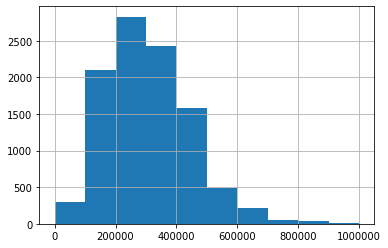

In [22]:
data_clean["Listing"].hist(bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000,
                                 800000, 900000, 1000000])

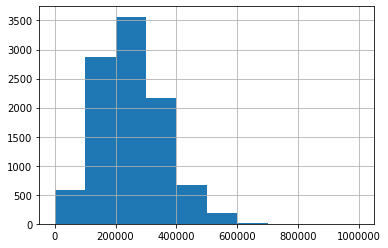

In [23]:
data_clean["Sale"].hist(bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000,
                                 800000, 900000, 1000000])

In [24]:
data_clean["Date"] = pd.to_datetime(data_clean["Date"]).dt.strftime('%Y-%m')
data_clean.dtypes

Date        object
ZipCode      int64
City        object
State       object
Metro       object
County      object
Listing    float64
Sale         int64
dtype: object

In [25]:
data_clean[:5]

Date  ZipCode            City State  \
0  2010-01    33013         Hialeah    FL   
1  2010-01    33019       Hollywood    FL   
2  2010-01    33023         Miramar    FL   
3  2010-01    33024  Pembroke Pines    FL   
4  2010-01    33028  Pembroke Pines    FL   

                                   Metro             County   Listing    Sale  
0  Miami-Fort Lauderdale-West Palm Beach  Miami-Dade County  180000.0  141000  
1  Miami-Fort Lauderdale-West Palm Beach     Broward County  334894.5  191400  
2  Miami-Fort Lauderdale-West Palm Beach     Broward County  129950.0   89600  
3  Miami-Fort Lauderdale-West Palm Beach     Broward County  159900.0  121000  
4  Miami-Fort Lauderdale-West Palm Beach     Broward County  320000.0  280300

In [26]:
# Miami-Dade
data_clean_miami = data_clean[data_clean['County'].str.contains('Miami')]
data_clean_miami = data_clean_miami.groupby(['Date'])['Listing', 'Sale'].median().reset_index()
data_clean_miami[:5]

Date   Listing    Sale
0  2010-01  216250.0  162000
1  2010-02  214900.0  159400
2  2010-03  209950.0  169100
3  2010-04  199900.0  167400
4  2010-05  199000.0  170200

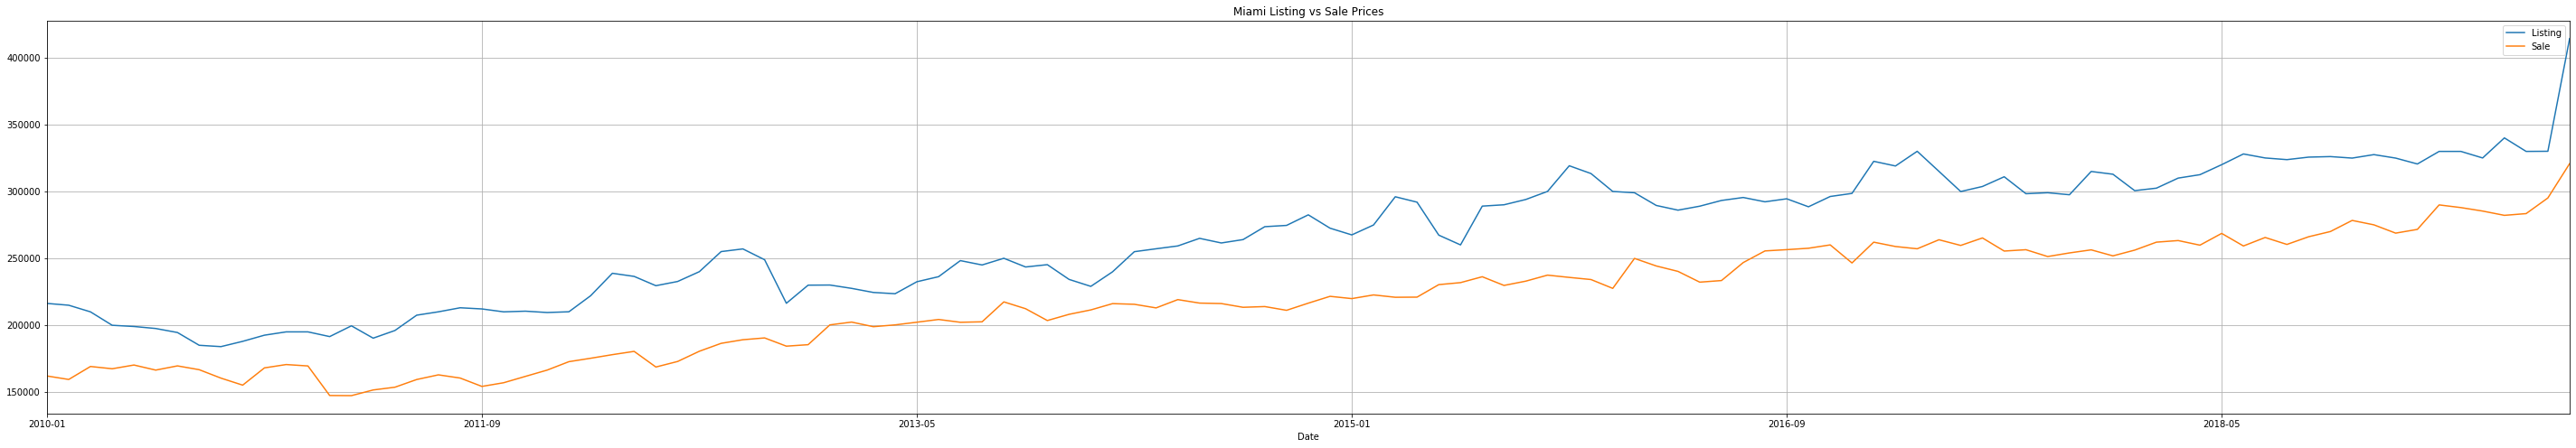

In [27]:
# Miami-Dade
data_clean_miami[['Date','Listing','Sale']].plot('Date', figsize=(50,8), grid=True, title="Miami Listing vs Sale Prices")

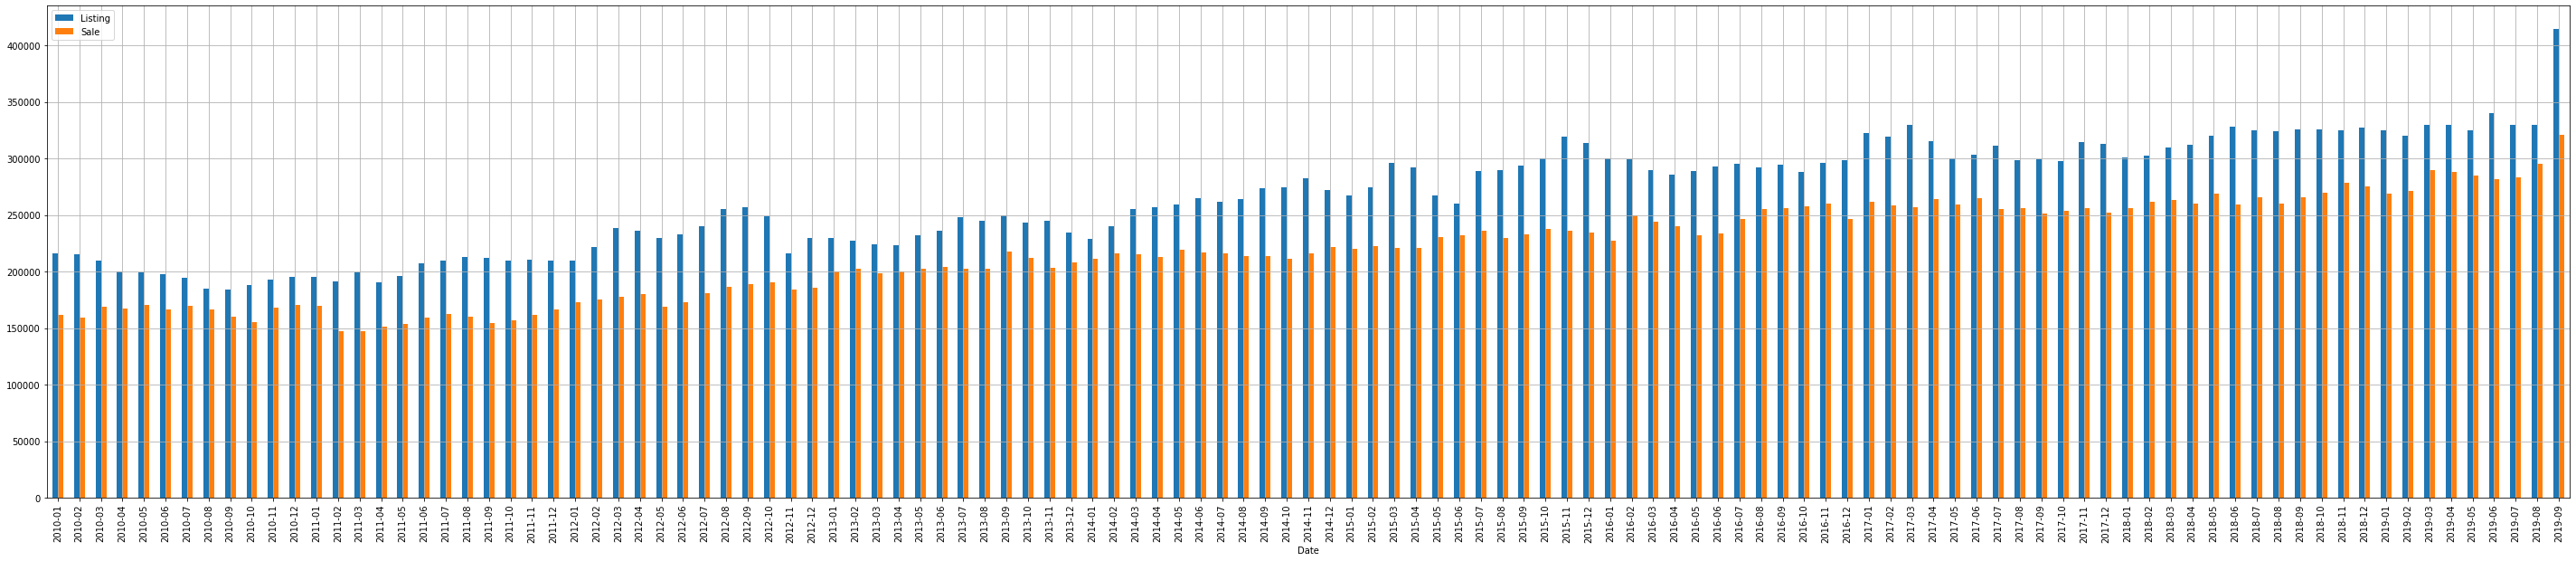

In [28]:
# Miami-Dade
data_clean_miami[['Date','Listing', 'Sale']].plot('Date', figsize=(50,10), kind='bar', grid=True)

In [29]:
# Miami-Dade
data_clean_miami['PercRedux'] = (data_clean_miami['Listing']-data_clean_miami['Sale'])\
    /data_clean_miami['Listing']
data_clean_miami.PercRedux = (data_clean_miami.PercRedux * 100).round()
data_clean_miami[:5]

Date   Listing    Sale  PercRedux
0  2010-01  216250.0  162000       25.0
1  2010-02  214900.0  159400       26.0
2  2010-03  209950.0  169100       19.0
3  2010-04  199900.0  167400       16.0
4  2010-05  199000.0  170200       14.0

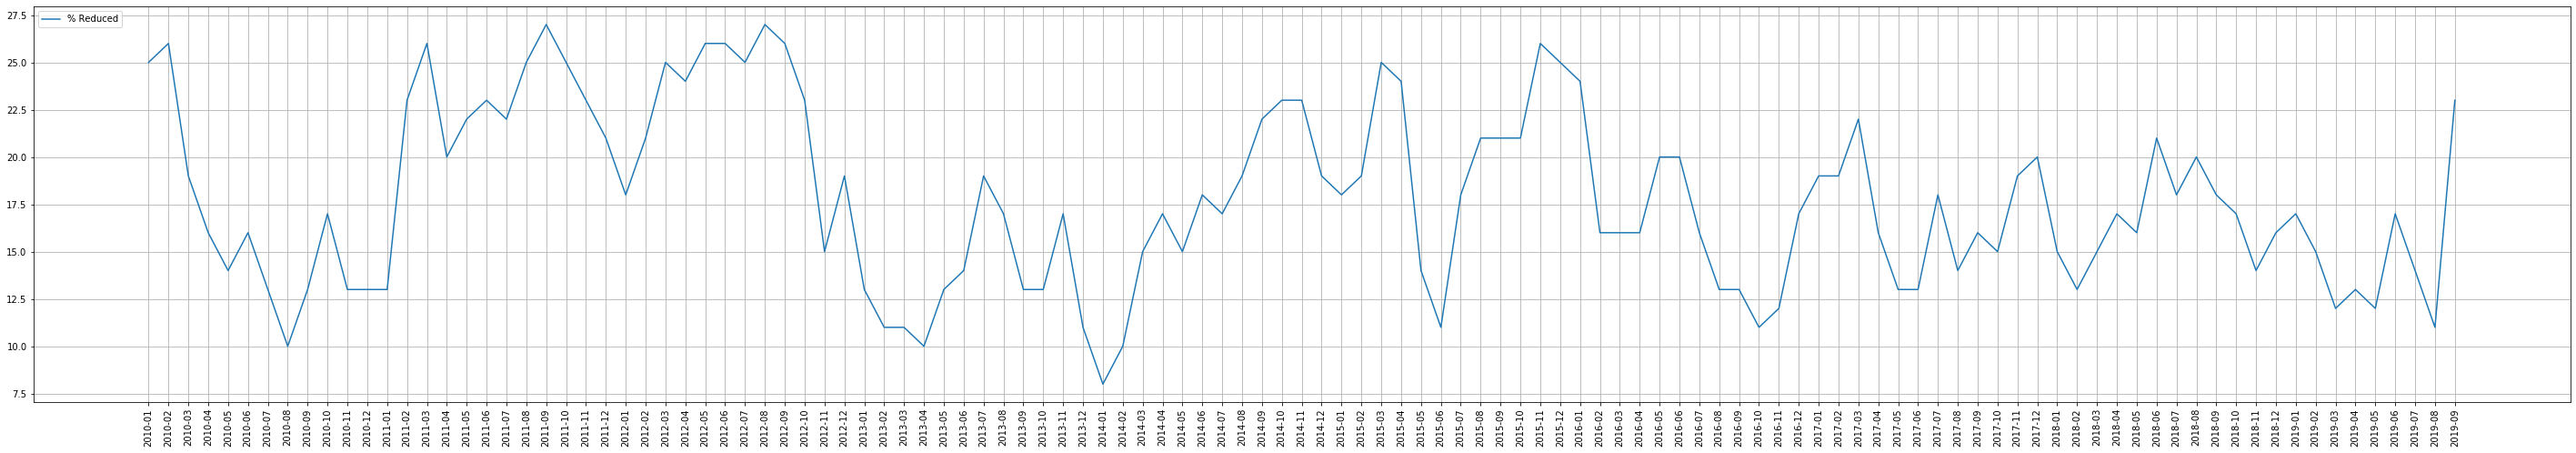

In [30]:
# Miami-Dade
plt.figure(figsize = (50, 8))
plt.xticks(rotation=90)
plt.grid()
plt.plot(data_clean_miami.Date, data_clean_miami.PercRedux)
plt.legend(['% Reduced'], loc='upper left')

In [31]:
# Broward
data_clean_broward = data_clean[data_clean['County'].str.contains('Broward')]
data_clean_broward = data_clean_broward.groupby(['Date'])['Listing', 'Sale'].median().reset_index()
data_clean_broward['PercRedux'] = (data_clean_broward['Listing']-data_clean_broward['Sale'])\
    /data_clean_broward['Listing']
data_clean_broward.PercRedux = (data_clean_broward.PercRedux * 100).round()
data_clean_broward[:5]

Date    Listing    Sale  PercRedux
0  2010-01  297450.00  190000       36.0
1  2010-02  293728.25  204400       30.0
2  2010-03  279999.75  203150       27.0
3  2010-04  290088.50  206750       29.0
4  2010-05  283749.75  184650       35.0

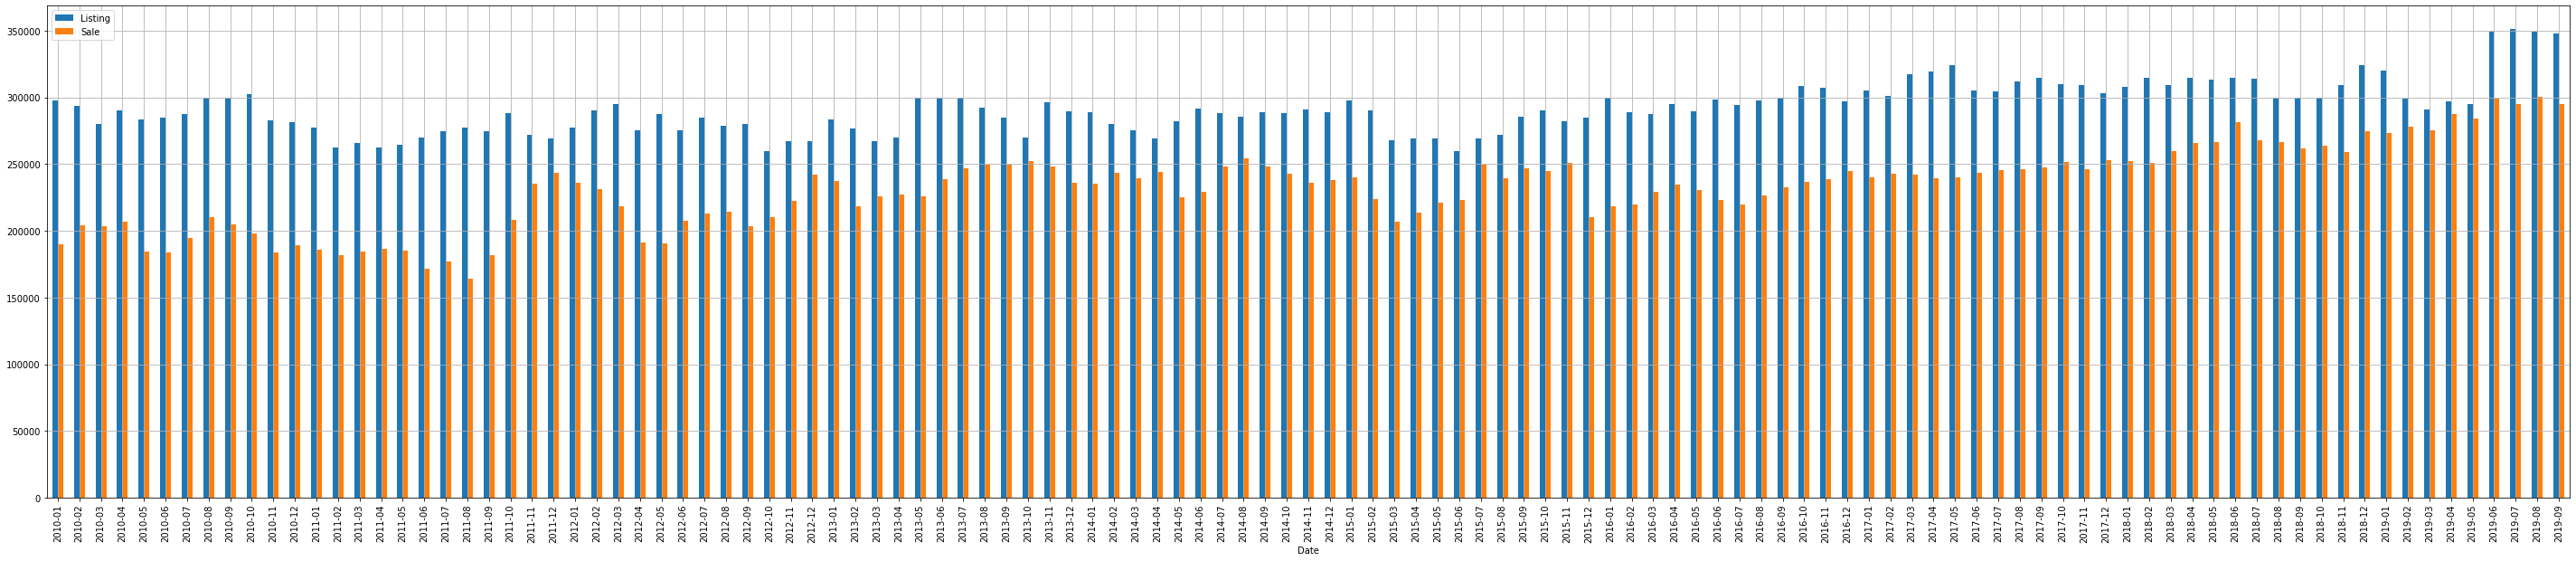

In [32]:
# Broward
data_clean_broward[['Date','Listing', 'Sale']].plot('Date', figsize=(50,10), kind='bar', grid=True)

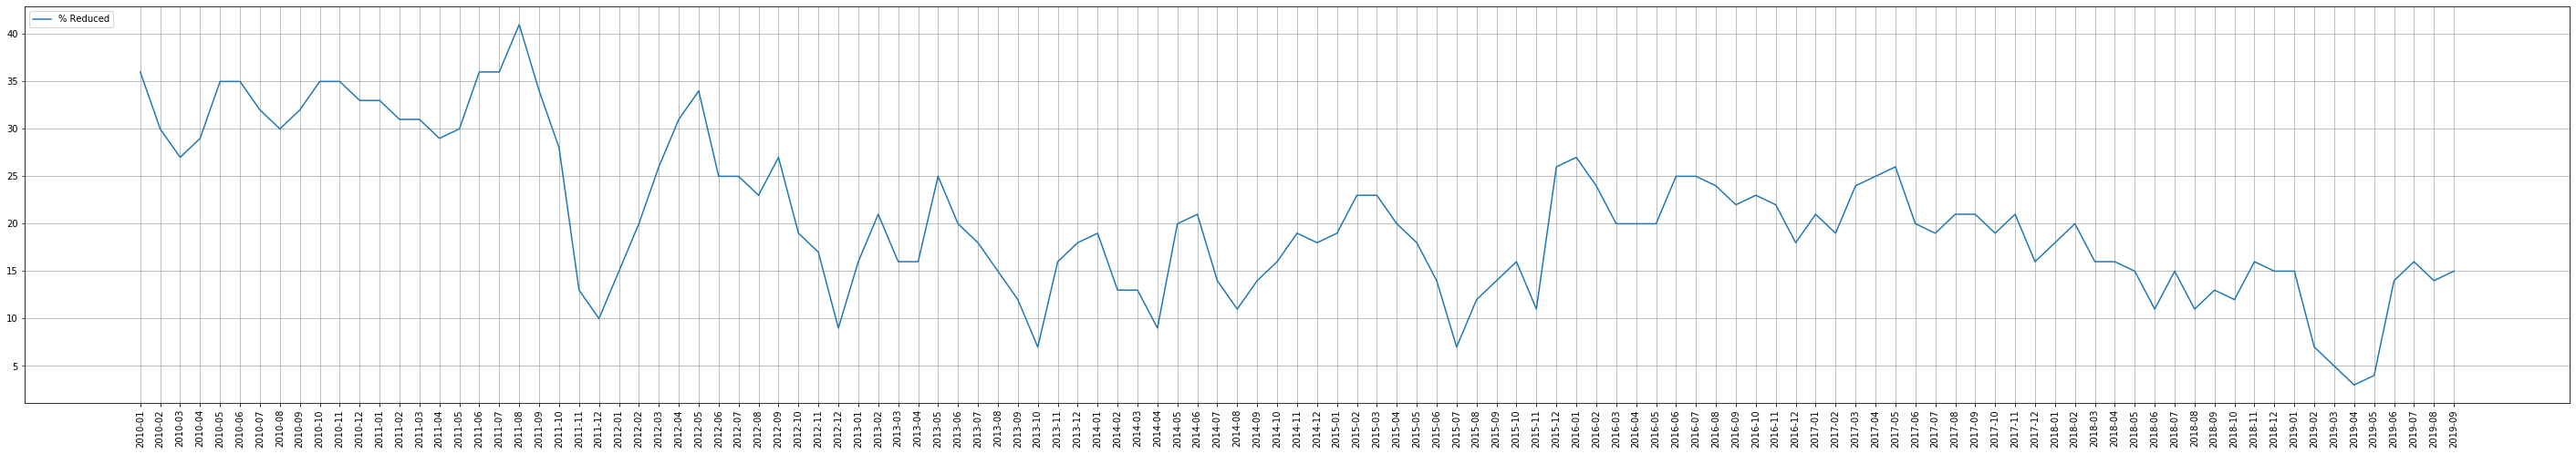

In [33]:
# Broward
plt.figure(figsize = (50, 8))
plt.xticks(rotation=90)
plt.grid()
plt.plot(data_clean_broward.Date, data_clean_broward.PercRedux)
plt.legend(['% Reduced'], loc='upper left')

In [34]:
# Palm Beach
data_clean_palmbeach = data_clean[data_clean['County'].str.contains('Palm Beach')]
data_clean_palmbeach = data_clean_palmbeach.groupby(['Date'])['Listing', 'Sale'].median().reset_index()
data_clean_palmbeach['PercRedux'] = (data_clean_palmbeach['Listing']-data_clean_palmbeach['Sale'])\
    /data_clean_palmbeach['Listing']
data_clean_palmbeach.PercRedux = (data_clean_palmbeach.PercRedux * 100).round()
data_clean_palmbeach[:5]

Date   Listing    Sale  PercRedux
0  2010-01  285475.0  206500       28.0
1  2010-02  287200.0  212450       26.0
2  2010-03  287000.0  212150       26.0
3  2010-04  287000.0  205850       28.0
4  2010-05  287425.0  198100       31.0

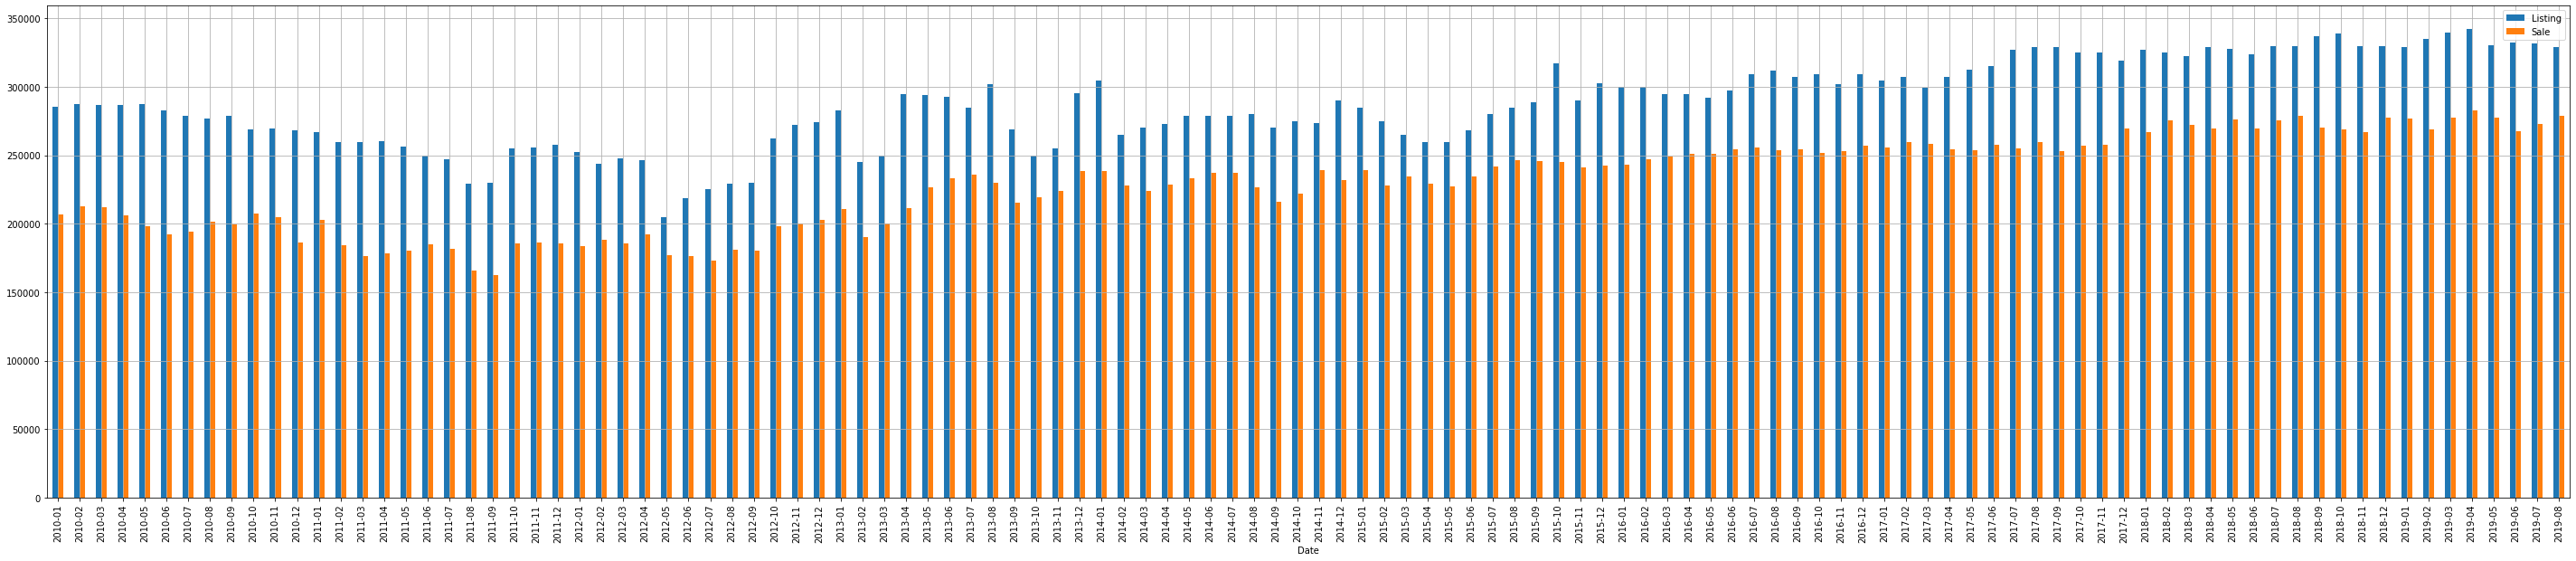

In [35]:
# Palm Beach
data_clean_palmbeach[['Date','Listing', 'Sale']].plot('Date', figsize=(50,10), kind='bar', grid=True)

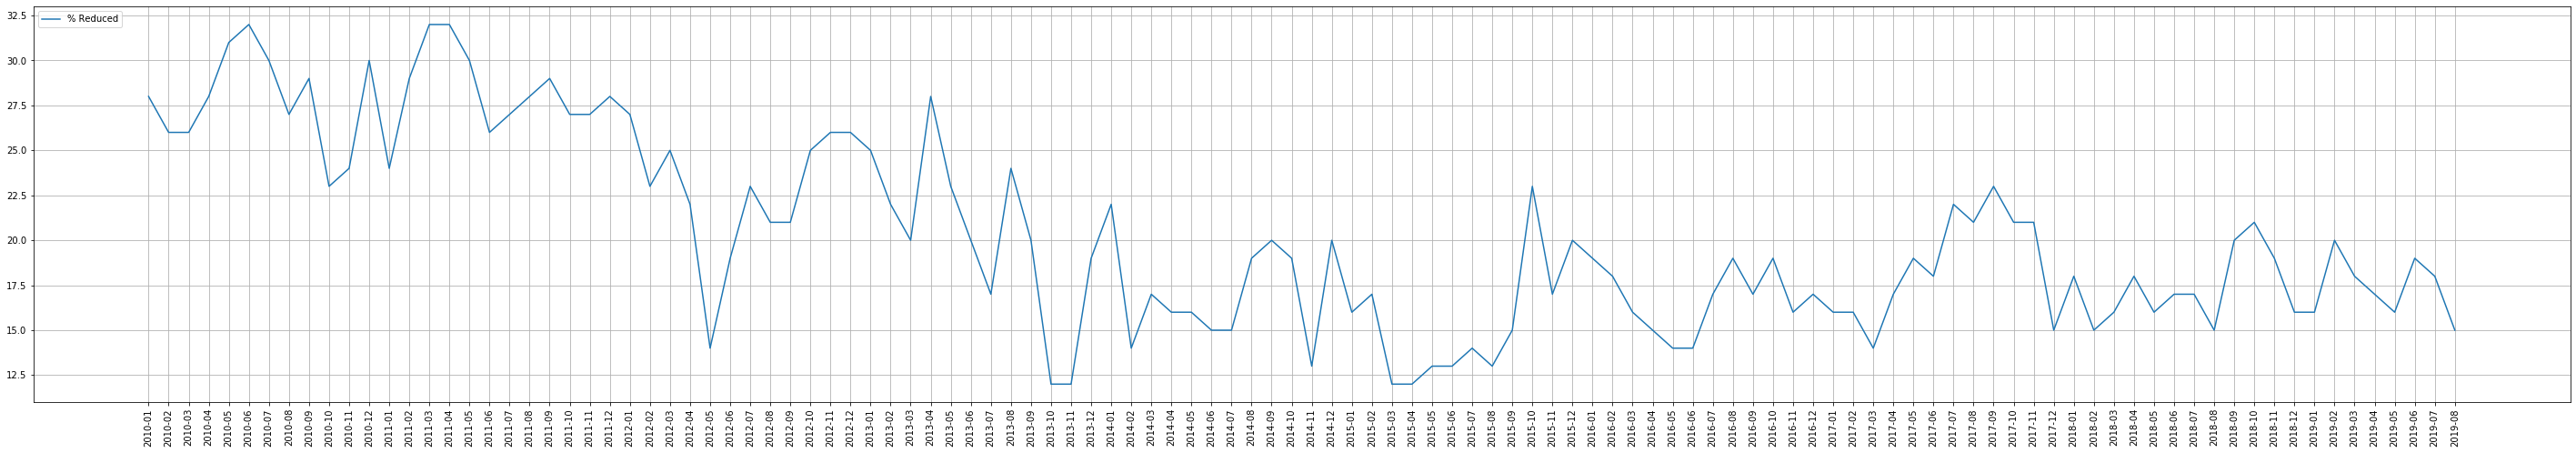

In [36]:
# Palm Beach
plt.figure(figsize = (50, 8))
plt.xticks(rotation=90)
plt.grid()
plt.plot(data_clean_palmbeach.Date, data_clean_palmbeach.PercRedux)
plt.legend(['% Reduced'], loc='upper left')

In [ ]:
# Distribution of housing prices from 2010-2019
fig, axes = plt.subplots(2, 1, figsize=(200, 15), sharex=True)
plt.xticks(rotation=90)
for name, ax in zip(['Listing', 'Sale'], axes):
    sns.violinplot(data=data_clean, x='ZipCode', y=name, ax=ax)
ax.set_title(name)

# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

In [ ]:
data_clean_grouped = data_clean
data_clean_grouped.groupby(['City', 'Date'])['Listing', 'Sale'].median().reset_index()
data_clean_grouped['PercRedux'] = (data_clean_grouped['Listing']-data_clean_grouped['Sale'])\
    /data_clean_grouped['Listing']
data_clean_grouped.PercRedux = (data_clean_grouped.PercRedux * 100).round()
data_clean_grouped[:5]

In [ ]:
data_clean_city = data_clean.pivot_table(index=['City'], values=['Listing'], 
                              columns='Date', aggfunc='mean', margins="True").reset_index()
data_clean_city.columns = [' '.join(col).strip() for col in data_clean_city.columns.values]
data_clean_city.columns = [col.replace('Listing', '') for col in data_clean_city.columns]
data_clean_city[:5]

In [ ]:
median_prices = data_clean_city.median()
median_prices.tail() 
aventura = data_clean_city[data_clean_city["City"] == "Aventura"].median()
boca = data_clean_city[data_clean_city["City"] == "Boca Raton"].median()
boynton = data_clean_city[data_clean_city["City"] == "Boynton Beach"].median()
cococreek = data_clean_city[data_clean_city["City"] == "Coconut Creek"].median()
coralgables = data_clean_city[data_clean_city["City"] == "Coral Gables"].median()
coralsprings = data_clean_city[data_clean_city["City"] == "Coral Springs"].median()
countryclub = data_clean_city[data_clean_city["City"] == "Country Club"].median()
cutlerbay = data_clean_city[data_clean_city["City"] == "Cutler Bay"].median()
davie = data_clean_city[data_clean_city["City"] == "Davie"].median()
deerfieldbeach = data_clean_city[data_clean_city["City"] == "Deerfield Beach"].median()
delray = data_clean_city[data_clean_city["City"] == "Delray Beach"].median()
floridacity = data_clean_city[data_clean_city["City"] == "Florida City"].median()
ftlauderdale = data_clean_city[data_clean_city["City"] == "Fort Lauderdale"].median()
fountainbleau = data_clean_city[data_clean_city["City"] == "Fountainbleau"].median()
glenvar = data_clean_city[data_clean_city["City"] == "Glenvar Heights"].median()
goulds = data_clean_city[data_clean_city["City"] == "Goulds"].median()
greenacres = data_clean_city[data_clean_city["City"] == "Greenacres"].median()
hallandale = data_clean_city[data_clean_city["City"] == "Hallandale"].median()
hialeah = data_clean_city[data_clean_city["City"] == "Hialeah"].median()
hollywood = data_clean_city[data_clean_city["City"] == "Hollywood"].median()
homestead = data_clean_city[data_clean_city["City"] == "Homestead"].median()
ivesestates = data_clean_city[data_clean_city["City"] == "Ives Estates"].median()
jupiter = data_clean_city[data_clean_city["City"] == "Jupiter"].median()
kendale = data_clean_city[data_clean_city["City"] == "Kendale Lakes"].median()
kendall = data_clean_city[data_clean_city["City"] == "Kendall"].median()
kendallwest = data_clean_city[data_clean_city["City"] == "Kendall West"].median()
lakeclarke = data_clean_city[data_clean_city["City"] == "Lake Clarke Shores"].median()
lakepark = data_clean_city[data_clean_city["City"] == "Lake Park"].median()
lakeworth = data_clean_city[data_clean_city["City"] == "Lake Worth"].median()
lantana = data_clean_city[data_clean_city["City"] == "Lantana"].median()
lauderhill = data_clean_city[data_clean_city["City"] == "Lauderhill"].median()
loxahatchee = data_clean_city[data_clean_city["City"] == "Loxahatchee Groves"].median()
margate = data_clean_city[data_clean_city["City"] == "Margate"].median()
miami = data_clean_city[data_clean_city["City"] == "Miami"].median()
miamibeach = data_clean_city[data_clean_city["City"] == "Miami Beach"].median()
miamigardens = data_clean_city[data_clean_city["City"] == "Miami Gardens"].median()
miamisprings = data_clean_city[data_clean_city["City"] == "Miami Springs"].median()
miramar = data_clean_city[data_clean_city["City"] == "Miramar"].median()
northlauderdale = data_clean_city[data_clean_city["City"] == "North Lauderdale"].median()
northmiami = data_clean_city[data_clean_city["City"] == "North Miami"].median()
northmiamibeach = data_clean_city[data_clean_city["City"] == "North Miami Beach"].median()
northpalmbeach = data_clean_city[data_clean_city["City"] == "North Palm Beach"].median()
oaklandpark = data_clean_city[data_clean_city["City"] == "Oakland Park"].median()
palmbeachgardens = data_clean_city[data_clean_city["City"] == "Palm Beach Gardens"].median()
palmsprings = data_clean_city[data_clean_city["City"] == "Palm Springs"].median()
parkland = data_clean_city[data_clean_city["City"] == "Parkland"].median()
pembrokepines = data_clean_city[data_clean_city["City"] == "Pembroke Pines"].median()
plantation = data_clean_city[data_clean_city["City"] == "Plantation"].median()
pompano = data_clean_city[data_clean_city["City"] == "Pompano Beach"].median()
royalpalmbeach = data_clean_city[data_clean_city["City"] == "Royal Palm Beach"].median()
southmiamiheights = data_clean_city[data_clean_city["City"] == "South Miami Heights"].median()
sunrise = data_clean_city[data_clean_city["City"] == "Sunrise"].median()
tamarac = data_clean_city[data_clean_city["City"] == "Tamarac"].median()
tamiami = data_clean_city[data_clean_city["City"] == "Tamiami"].median()
tequesta = data_clean_city[data_clean_city["City"] == "Tequesta"].median()
thecrossings = data_clean_city[data_clean_city["City"] == "The Crossings"].median()
thehammocks = data_clean_city[data_clean_city["City"] == "The Hammocks"].median()
universitypark = data_clean_city[data_clean_city["City"] == "University Park"].median()
villageofpalmetto = data_clean_city[data_clean_city["City"] == "Village of Palmetto Bay"].median()
wellington = data_clean_city[data_clean_city["City"] == "Wellington"].median()
westlittleriver = data_clean_city[data_clean_city["City"] == "West Little River"].median()
westpalmbeach = data_clean_city[data_clean_city["City"] == "West Palm Beach"].median()
weston = data_clean_city[data_clean_city["City"] == "West Palm Beach"].median()
westview = data_clean_city[data_clean_city["City"] == "Westview"].median()

In [ ]:
df_comparison = pd.concat([miami, miramar, aventura, median_prices], axis=1)
df_comparison.columns = ["Miami", "Miramar", "Aventura", "Median SFL"]
df_comparison.plot(figsize=(15,10))